## 선박대기비용 절감효과(선석별)
##### BH = (V' x W' - V x W) x(WC + FC + EC)
###### 선박대기시간 예측모형 개발을 위한 방법론 연구, 2023

- BH = (V' x W' - V x W) x(WC + FC + EC)
- BH : t년도 선박대기비용 절감효과
- Vt(Vt') : with case(without case)의 t년도 선석에서의 선박 입항 수
- Wt(Wt') : with case(without case)의 t년도 선석의 선박당 평균 대기시간(분)
- WC : **액체화물 분당** 평균 체선비용
- FC : **액체화물 분당** 평균 체화비용
- EC : **액체화물 분당** 평균 환경비용

→ **표준선형 > 액체화물**로 변경, **시간당 > 분당** 변경

In [327]:
import warnings
warnings.filterwarnings('ignore')

In [328]:
import pandas as pd
PATH  = '../data/'

df = pd.read_csv(PATH + '액체_ver_2.csv')
#time_cost = pd.read_csv(PATH + '체선비용.csv', encoding = 'utf-8')
time_cost = pd.read_csv(PATH + '체선비용.csv', encoding='euc-kr')


### 분당 체선비용

In [329]:
time_cost['분당비용'] = time_cost['시간당비용']/60

In [330]:
time_cost[['선박크기(DWT)','시간당비용','분당비용']]

,선박크기(DWT),시간당비용,분당비용
0,"10,000",383000,6383.333333
1,"30,000",742000,12366.666667
2,"50,000",1010000,16833.333333
3,"150,000",1959000,32650.000000
4,"200,000",2330000,38833.333333
5,"250,000",2665000,44416.666667
6,"300,000",2975000,49583.333333
7,"350,000",3265000,54416.666667
8,"400,000",3538000,58966.666667
9,"450,000",3799000,63316.666667


In [331]:
time_cost[['선박크기(DWT)','분당비용']]

,선박크기(DWT),분당비용
0,"10,000",6383.333333
1,"30,000",12366.666667
2,"50,000",16833.333333
3,"150,000",32650.000000
4,"200,000",38833.333333
5,"250,000",44416.666667
6,"300,000",49583.333333
7,"350,000",54416.666667
8,"400,000",58966.666667
9,"450,000",63316.666667


In [332]:
# '선박크기(DWT)' 열 값 가져오기
bins = [0, 10000, 30000, 50000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000, float('inf')]

# 라벨 설정
labels = ['{}-{}'.format(bins[i], bins[i+1]) for i in range(len(bins)-1)]

# 'DWT_구간' 열 생성
df['DWT_구간'] = pd.cut(df['재화중량톤수'], bins=bins, labels=labels, right=False)

In [333]:
mapping = {'0-10000': 6383.333333, '10000-30000': 12366.666667, '30000-50000': 16833.333333, '50000-150000': 32650.000000,
           '150000-200000': 38833.333333, '200000-250000': 44416.666667, '250000-300000': 49583.333333, '300000-350000': 54416.666667,
           '350000-400000': 58966.666667, '400000-450000': 63316.666667, '450000-500000': 67466.666667, '500000+': None}

# '시간당_체선비용' 열 생성
df['분당_체선비용'] = df['DWT_구간'].map(mapping)

In [334]:
# mapping = {'0-10000': 383000, '10000-30000': 742000, '30000-50000': 1010000, '50000-150000': 1959000,
#            '150000-200000': 2330000, '200000-250000': 2665000, '250000-300000': 2975000, '300000-350000': 3265000,
#            '350000-400000': 3538000, '400000-450000': 3799000, '450000-500000': 4048000, '500000-inf': None}

# df['시간당_체선비용'] = df['DWT_구간'].map(mapping)

In [335]:
# df['분당_체선비용'] = df['분당비용']*df['접안_대기시간_분']

In [336]:
# df['시간당_체선비용'] = df['분당_체선비용']*60

### 분당 체화비용
- 화물가치 x 사회적 할인율 / 365 * 24 * 60
- 화물가치 :  (kg당 화물가치(원) 유류 600(수입), 694(수출)의 평균값 647로 계산)
- 화물가치 = 재화중량톤수*1000 * 647

In [337]:
df['분당_체화비용'] = df['재화중량톤수']*1000*647*0.045/365*24*60

### 분당 환경비용

**EC 대기오염 비용**
- 배출량 구하기 ( 완료) - 온실가스 배출량(CO, NOx)
    - 2개 밖에 없음 > 한계점
- 배출량에 따른 사회적 비용 산정
    - CO * 158(온실가스 배출량에서 구한 CO)
    - NOx*15835(온실가스 배출량에서 구한 NOx)

In [338]:
df['CO비용'] = df['CO']*158
df['NOx비용'] = df['NOx']*15835

In [339]:
df['분당_CO비용'] = df['CO비용'] 
df['분당_NOx비용'] = df['NOx비용']

In [340]:
df['분당_환경비용'] = df['분당_CO비용'] + df['분당_NOx비용']

### Year 그룹화

In [341]:
df.head()

,Datetime,ETA_Year,ETA_Month,ETA_Day,ETA_Hour,호출부호,입항일시,출항일시,접안_대기시간_분,출항_대기시간_분,...,CO,NOx,DWT_구간,분당_체선비용,분당_체화비용,CO비용,NOx비용,분당_CO비용,분당_NOx비용,분당_환경비용
0,2020-01-01 01:00:00,2020,1,1,1,88238,2020-01-01 01:05:00,2020-01-01 08:15,0,0.0,...,0.000000,0.000000,0-10000,6383.333333,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
1,2020-01-01 03:00:00,2020,1,1,3,DSRB9,2020-01-01 03:05:00,2020-01-01 14:55,0,0.0,...,0.000000,0.000000,0-10000,6383.333333,3.444791e+08,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
2,2020-01-01 04:00:00,2020,1,1,4,D7SC,2020-01-01 04:30:00,2020-01-01 20:40,0,0.0,...,0.000000,0.000000,0-10000,6383.333333,2.625806e+08,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
3,2020-01-01 05:00:00,2020,1,1,5,130095,2020-01-01 05:40:00,2020-01-02 11:00,0,0.0,...,0.000000,0.000000,0-10000,6383.333333,2.625806e+08,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
4,2020-01-01 05:00:00,2020,1,1,5,160014,2020-01-01 05:30:00,2020-01-02 02:30,517,0.0,...,582.254878,6176.622696,0-10000,6383.333333,3.278237e+08,91996.270777,9.780682e+07,91996.270777,9.780682e+07,9.789882e+07


In [342]:
temp = df.groupby(['계선장소명', 'ETA_Year']).agg(
    입항일시=('입항일시', 'count'),
    접안_대기시간_분=('접안_대기시간_분', 'mean'), #입출항 1건당 평균
    분당_환경비용=('분당_환경비용', 'mean'),
    분당_체화비용=('분당_체화비용', 'mean'),
    분당_체선비용=('분당_체선비용', 'mean'),
    CO배출량 = ('CO','sum'),
    NOx배출량 = ('NOx','sum')
    
)

In [343]:
temp.head()

입항일시   접안_대기시간_분       분당_환경비용       분당_체화비용  \
계선장소명          ETA_Year                                                 
(구)벙커링전용정박지 E1 2020       289  333.425606  8.722620e+07  8.778148e+08   
               2021       200  483.545000  1.133986e+08  7.706269e+08   
(구)벙커링전용정박지 E2 2020       148  302.040541  9.512696e+07  3.057492e+09   
               2021       106  426.933962  1.438081e+08  2.727683e+09   
(구)벙커링전용정박지 E3 2020        66  570.121212  3.510697e+08  6.748288e+09   

                              분당_체선비용          CO배출량        NOx배출량  
계선장소명          ETA_Year                                             
(구)벙커링전용정박지 E1 2020       8178.258362  149927.217767  1.590444e+06  
               2021       7520.166666  134887.999632  1.430906e+06  
(구)벙커링전용정박지 E2 2020      13297.635135   83733.844437  8.882577e+05  
               2021      12738.364780   90661.905675  9.617513e+05  
(구)벙커링전용정박지 E3 2020      27254.040404  137807.527613  1.461877e+06

In [344]:
temp.reset_index(inplace = True)

In [345]:
temp.rename(columns = {'입항일시' : '입항수'}, inplace = True)

In [346]:
temp['분당_체선비용'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 339 entries, 0 to 338
Series name: 분당_체선비용
Non-Null Count  Dtype  
--------------  -----  
339 non-null    float64
dtypes: float64(1)
memory usage: 2.8 KB


In [347]:
temp = temp.reset_index()

### BH = (V' x W' - V x W) x(WC + FC + EC)

In [348]:
temp['계선장소명'].nunique() # 3년

125

In [349]:
dock_22 = temp.copy()

In [350]:
dock_22.head()

,index,계선장소명,ETA_Year,입항수,접안_대기시간_분,분당_환경비용,분당_체화비용,분당_체선비용,CO배출량,NOx배출량
0,0,(구)벙커링전용정박지 E1,2020,289,333.425606,8.722620e+07,8.778148e+08,8178.258362,149927.217767,1.590444e+06
1,1,(구)벙커링전용정박지 E1,2021,200,483.545000,1.133986e+08,7.706269e+08,7520.166666,134887.999632,1.430906e+06
2,2,(구)벙커링전용정박지 E2,2020,148,302.040541,9.512696e+07,3.057492e+09,13297.635135,83733.844437,8.882577e+05
3,3,(구)벙커링전용정박지 E2,2021,106,426.933962,1.438081e+08,2.727683e+09,12738.364780,90661.905675,9.617513e+05
4,4,(구)벙커링전용정박지 E3,2020,66,570.121212,3.510697e+08,6.748288e+09,27254.040404,137807.527613,1.461877e+06


In [351]:
dock_22['접안_대기시간_분_5%_감소'] = dock_22['접안_대기시간_분']*0.95

In [352]:
dock_22['BH(5%)'] = (dock_22['입항수']*dock_22['접안_대기시간_분'] - dock_22['입항수']*dock_22['접안_대기시간_분_5%_감소'])*(dock_22['분당_환경비용']+dock_22['분당_체선비용']+dock_22['분당_체화비용'])

In [353]:
dock_22['선박대기비용'] = (dock_22['입항수']*dock_22['접안_대기시간_분'])*(dock_22['분당_환경비용']+dock_22['분당_체선비용']+dock_22['분당_체화비용'])

In [354]:
def Decrease_Rate(i): #i : 1 - 접안_대기시간_감소 퍼센트
    dock_22['선박대기비용_'+ str(i)] = (dock_22['입항수']*dock_22['접안_대기시간_분']*i)*(dock_22['분당_환경비용']+dock_22['분당_체선비용']+dock_22['분당_체화비용'])
    dock_22['BH_'+ str(i)] = dock_22['선박대기비용'] - dock_22['선박대기비용_'+ str(i)]
    cost20 = dock_22[dock_22['ETA_Year'] == 2020]['선박대기비용_'+ str(i)].mean() 
    cost21 = dock_22[dock_22['ETA_Year'] == 2021]['선박대기비용_'+ str(i)].mean()
    cost22 = dock_22[dock_22['ETA_Year'] == 2021]['선박대기비용_'+ str(i)].mean()
    
    cost20_df = dock_22[dock_22['ETA_Year'] == 2020]['선박대기비용'].mean() 
    cost21_df = dock_22[dock_22['ETA_Year'] == 2021]['선박대기비용'].mean()
    cost22_df = dock_22[dock_22['ETA_Year'] == 2021]['선박대기비용'].mean()
    
    cost_df = (cost20_df + cost21_df + cost22_df) / 3
    cost = (cost20 + cost21 + cost22) / 3
    
    return(cost_df,cost,cost_df - cost)
    
    

In [355]:
def Decrease_Money(i): #i : 1 - 접안_대기시간_감소 퍼센트
    dock_22['선박대기비용_'+ str(i)+'분'] = (dock_22['입항수']*(dock_22['접안_대기시간_분']-i))*(dock_22['분당_환경비용']+dock_22['분당_체선비용']+dock_22['분당_체화비용'])
    dock_22['BH_'+ str(i) + '분'] = dock_22['선박대기비용'] - dock_22['선박대기비용_'+ str(i)+'분']
    cost20 = dock_22[dock_22['ETA_Year'] == 2020]['선박대기비용_'+ str(i)+'분'].mean()
    cost21 = dock_22[dock_22['ETA_Year'] == 2021]['선박대기비용_'+ str(i)+'분'].mean()
    cost22 = dock_22[dock_22['ETA_Year'] == 2021]['선박대기비용_'+ str(i)+'분'].mean()
    
    cost20_df = dock_22[dock_22['ETA_Year'] == 2020]['선박대기비용'].mean()
    cost21_df = dock_22[dock_22['ETA_Year'] == 2021]['선박대기비용'].mean()
    cost22_df = dock_22[dock_22['ETA_Year'] == 2021]['선박대기비용'].mean()
    
    cost_df = (cost20_df + cost21_df + cost22_df) / 3
    cost = (cost20 + cost21 + cost22) / 3
    
    return(cost_df,cost,cost_df - cost)

In [356]:
Decrease_Rate(0.95)

(94775122253627.62, 90036366140946.23, 4738756112681.391)

In [357]:
Decrease_Rate(0.9)

(94775122253627.62, 85297610028264.88, 9477512225362.75)

In [358]:
Decrease_Money(1)

(94775122253627.62, 94627986470874.42, 147135782753.20312)

In [359]:
dock_22

,index,계선장소명,ETA_Year,입항수,접안_대기시간_분,분당_환경비용,분당_체화비용,분당_체선비용,CO배출량,NOx배출량,접안_대기시간_분_5%_감소,BH(5%),선박대기비용,선박대기비용_0.95,BH_0.95,선박대기비용_0.9,BH_0.9,선박대기비용_1분,BH_1분
0,0,(구)벙커링전용정박지 E1,2020,289,333.425606,8.722620e+07,8.778148e+08,8178.258362,149927.217767,1.590444e+06,316.754325,4.649607e+12,9.299214e+13,8.834253e+13,4.649607e+12,8.369292e+13,9.299214e+12,9.271324e+13,2.788992e+11
1,1,(구)벙커링전용정박지 E1,2021,200,483.545000,1.133986e+08,7.706269e+08,7520.166666,134887.999632,1.430906e+06,459.367750,4.274697e+12,8.549395e+13,8.121925e+13,4.274697e+12,7.694455e+13,8.549395e+12,8.531714e+13,1.768066e+11
2,2,(구)벙커링전용정박지 E2,2020,148,302.040541,9.512696e+07,3.057492e+09,13297.635135,83733.844437,8.882577e+05,286.938514,7.046449e+12,1.409290e+14,1.338825e+14,7.046449e+12,1.268361e+14,1.409290e+13,1.404624e+14,4.665896e+11
3,3,(구)벙커링전용정박지 E2,2021,106,426.933962,1.438081e+08,2.727683e+09,12738.364780,90661.905675,9.617513e+05,405.587264,6.497496e+12,1.299499e+14,1.234524e+14,6.497496e+12,1.169549e+14,1.299499e+13,1.296455e+14,3.043795e+11
4,4,(구)벙커링전용정박지 E3,2020,66,570.121212,3.510697e+08,6.748288e+09,27254.040404,137807.527613,1.461877e+06,541.615152,1.335678e+13,2.671357e+14,2.537789e+14,1.335678e+13,2.404221e+14,2.671357e+13,2.666671e+14,4.685594e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,334,화암부두 06,2020,3,0.000000,0.000000e+00,7.002915e+07,6383.333333,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.101066e+08,2.101066e+08
335,335,화암부두 06,2021,2,0.000000,0.000000e+00,2.036401e+08,6383.333333,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.072930e+08,4.072930e+08
336,336,효성부두,2020,223,127.367713,3.048669e+07,3.427036e+08,6879.147982,40434.385572,4.289323e+05,120.999327,5.299960e+11,1.059992e+13,1.006992e+13,5.299960e+11,9.539928e+12,1.059992e+12,1.051670e+13,8.322298e+10
337,337,효성부두,2021,298,54.318792,1.124598e+07,1.753743e+08,6503.803132,19931.926578,2.114400e+05,51.602852,1.510464e+11,3.020928e+12,2.869882e+12,1.510464e+11,2.718835e+12,3.020928e+11,2.965313e+12,5.561478e+10


1년 기준, 모든 선석에서 평균 대기시간을 5% 줄였을 때, 전체 선석에서 81조, 781억 9132만 9078원 7.6원 원 절감

In [360]:
# 소수점 단위 반올림
dock_22[['BH_0.95', '선박대기비용', '선박대기비용_0.95','선박대기비용_1분']] = dock_22[['BH_0.95', '선박대기비용', '선박대기비용_0.95','선박대기비용_1분']].round()

In [361]:
dock_22[['계선장소명', 'BH_0.95','선박대기비용', '선박대기비용_0.95','선박대기비용_1분']]

,계선장소명,BH_0.95,선박대기비용,선박대기비용_0.95,선박대기비용_1분
0,(구)벙커링전용정박지 E1,4.649607e+12,9.299214e+13,8.834253e+13,9.271324e+13
1,(구)벙커링전용정박지 E1,4.274697e+12,8.549395e+13,8.121925e+13,8.531714e+13
2,(구)벙커링전용정박지 E2,7.046449e+12,1.409290e+14,1.338825e+14,1.404624e+14
3,(구)벙커링전용정박지 E2,6.497496e+12,1.299499e+14,1.234524e+14,1.296455e+14
4,(구)벙커링전용정박지 E3,1.335678e+13,2.671357e+14,2.537789e+14,2.666671e+14
...,...,...,...,...,...
334,화암부두 06,0.000000e+00,0.000000e+00,0.000000e+00,-2.101066e+08
335,화암부두 06,0.000000e+00,0.000000e+00,0.000000e+00,-4.072930e+08
336,효성부두,5.299960e+11,1.059992e+13,1.006992e+13,1.051670e+13
337,효성부두,1.510464e+11,3.020928e+12,2.869882e+12,2.965313e+12


In [362]:
# def truncate_to_billion(value):
#     return round(value / 1e8)

# # 'BH(5%)', '선박대기비용', '선박대기비용(5%)' 열의 값을 억(10^8) 단위로 절삭
# dock_22[['BH_0.95', '선박대기비용', '선박대기비용_0.95']] = dock_22[['BH_0.95', '선박대기비용', '선박대기비용_0.95']].apply(truncate_to_billion)
# dock_22[['계선장소명', 'BH_0.95', '선박대기비용', '선박대기비용_0.95']]

In [363]:
dock_cost = dock_22[dock_22['선박대기비용'] >= 1]

In [364]:
dock_cost[['계선장소명', 'BH_0.95', '선박대기비용', '선박대기비용_0.95','선박대기비용_1분']]

,계선장소명,BH_0.95,선박대기비용,선박대기비용_0.95,선박대기비용_1분
0,(구)벙커링전용정박지 E1,4.649607e+12,9.299214e+13,8.834253e+13,9.271324e+13
1,(구)벙커링전용정박지 E1,4.274697e+12,8.549395e+13,8.121925e+13,8.531714e+13
2,(구)벙커링전용정박지 E2,7.046449e+12,1.409290e+14,1.338825e+14,1.404624e+14
3,(구)벙커링전용정박지 E2,6.497496e+12,1.299499e+14,1.234524e+14,1.296455e+14
4,(구)벙커링전용정박지 E3,1.335678e+13,2.671357e+14,2.537789e+14,2.666671e+14
...,...,...,...,...,...
331,현중해양의장안벽,3.611022e+11,7.222044e+12,6.860942e+12,7.098921e+12
332,화암부두 01,3.658990e+09,7.317979e+10,6.952080e+10,7.278208e+10
336,효성부두,5.299960e+11,1.059992e+13,1.006992e+13,1.051670e+13
337,효성부두,1.510464e+11,3.020928e+12,2.869882e+12,2.965313e+12


In [365]:
# '선박대기비용'을 기준으로 내림차순 정렬 후 상위 3개 선택
top_3_ports = dock_cost.sort_values(by='선박대기비용', ascending=False)

In [366]:
top_3_ports = top_3_ports[top_3_ports['ETA_Year'] == 2022]

In [367]:
top_3_ports = top_3_ports[['계선장소명','입항수','접안_대기시간_분','분당_환경비용','분당_체화비용','분당_체선비용','선박대기비용','선박대기비용_0.95','선박대기비용_1분']].head(5)
top_3_ports

,계선장소명,입항수,접안_대기시간_분,분당_환경비용,분당_체화비용,분당_체선비용,선박대기비용,선박대기비용_0.95,선박대기비용_1분
112,SK7부두,89,2607.853933,1.603911e+09,7.697442e+09,24448.314607,2.158840e+15,2.050898e+15,2.158013e+15
115,SK8부두,82,2215.329268,1.389779e+09,7.689313e+09,23369.715447,1.649285e+15,1.566821e+15,1.648541e+15
79,S-OIL3부두,274,1230.817518,4.333394e+08,2.379561e+09,11497.080292,9.486376e+14,9.012058e+14,9.478669e+14
73,S-OIL1부두,728,1098.497253,2.457833e+08,7.075403e+08,7527.060439,7.623846e+14,7.242654e+14,7.616906e+14
76,S-OIL2부두,906,594.661148,2.342495e+08,8.426135e+08,7987.711552,5.801782e+14,5.511693e+14,5.792026e+14


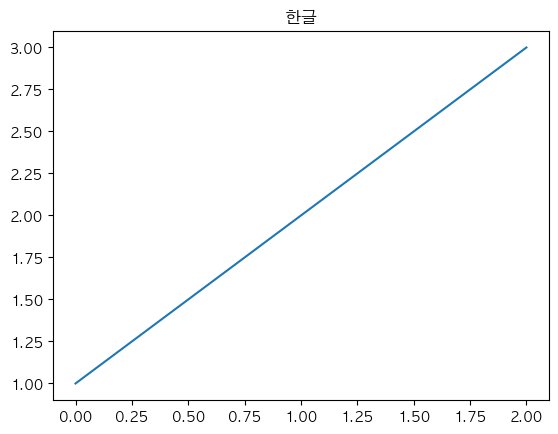

In [368]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("font", family="AppleGothic") # 라이브러리 불러오기와 함께 한번만 실행

plt.plot([1, 2, 3])
plt.title("한글")
plt.show()

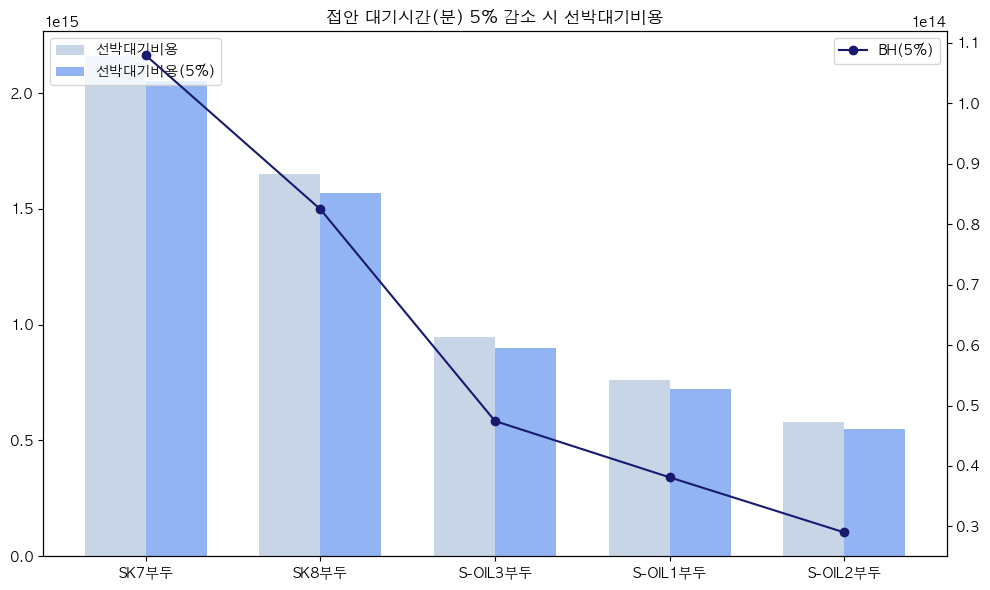

In [369]:
import matplotlib.pyplot as plt

# '선박대기비용'과 '선박대기비용(5%)' 그래프
fig, ax1 = plt.subplots(figsize=(10, 6))

# 각 항목의 위치 설정
bar_width = 0.35
bar_positions = range(len(top_3_ports))

# '선박대기비용' 그래프 (연한 녹색)
ax1.bar(bar_positions, top_3_ports['선박대기비용'], width=bar_width, label='선박대기비용', color='lightsteelblue', alpha=0.7)

# '선박대기비용(5%)' 그래프 (연한 파랑)
ax1.bar([p + bar_width for p in bar_positions], top_3_ports['선박대기비용_0.95'], width=bar_width, label='선박대기비용(5%)', color='cornflowerblue', alpha=0.7)

# 범례 표시
ax1.legend(loc='upper left')

# '선박대기비용 - 선박대기비용(5%)' 그래프 (BH(5%))
ax2 = ax1.twinx()
ax2.plot([p + bar_width / 2 for p in bar_positions], top_3_ports['선박대기비용'] - top_3_ports['선박대기비용_0.95'], marker='o', color='midnightblue', label='BH(5%)')

# 범례 표시
ax2.legend(loc='upper right')

# x 축 레이블과 타이틀 설정
plt.xlabel('항구')

# x 축 레이블 위치 조정
plt.xticks([p + bar_width / 2 for p in bar_positions], top_3_ports['계선장소명'])

# 레이아웃 조정
plt.title('접안 대기시간(분) 5% 감소 시 선박대기비용')

plt.tight_layout()
plt.show()


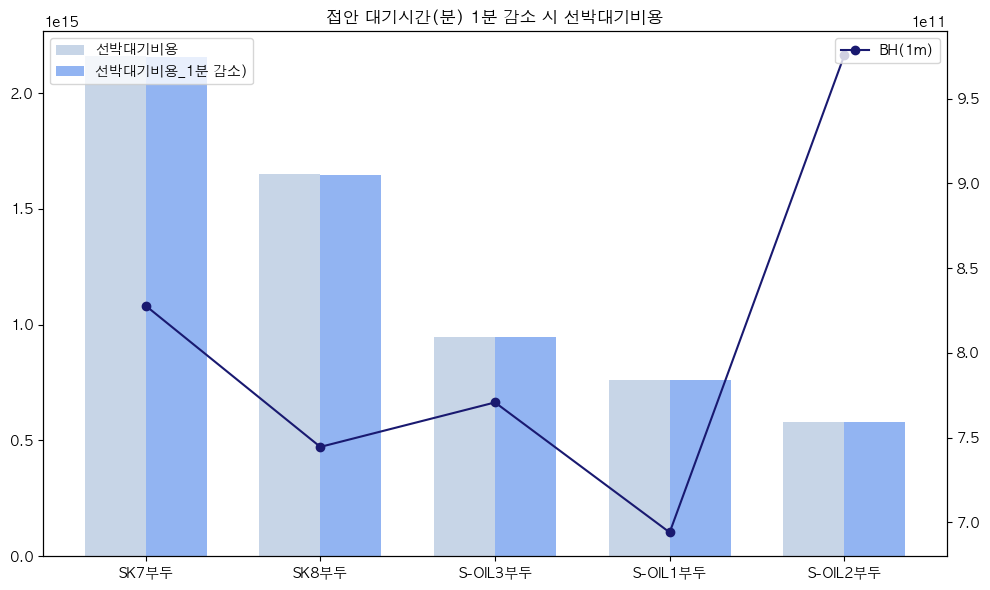

In [370]:
import matplotlib.pyplot as plt

# '선박대기비용'과 '선박대기비용(5%)' 그래프
fig, ax1 = plt.subplots(figsize=(10, 6))

# 각 항목의 위치 설정
bar_width = 0.35
bar_positions = range(len(top_3_ports))

# '선박대기비용' 그래프 (연한 녹색)
ax1.bar(bar_positions, top_3_ports['선박대기비용'], width=bar_width, label='선박대기비용', color='lightsteelblue', alpha=0.7)

# '선박대기비용(5%)' 그래프 (연한 파랑)
ax1.bar([p + bar_width for p in bar_positions], top_3_ports['선박대기비용_1분'], width=bar_width, label='선박대기비용_1분 감소', color='cornflowerblue', alpha=0.7)

# 범례 표시
ax1.legend(loc='upper left')

# '선박대기비용 - 선박대기비용(5%)' 그래프 (BH(5%))
ax2 = ax1.twinx()
ax2.plot([p + bar_width / 2 for p in bar_positions], top_3_ports['선박대기비용'] - top_3_ports['선박대기비용_1분'], marker='o', color='midnightblue', label='BH(1m)')

# 범례 표시
ax2.legend(loc='upper right')

# x 축 레이블과 타이틀 설정
plt.xlabel('항구')

# x 축 레이블 위치 조정
plt.xticks([p + bar_width / 2 for p in bar_positions], top_3_ports['계선장소명'])

# 레이아웃 조정
plt.title('접안 대기시간(분) 1분 감소 시 선박대기비용')

plt.tight_layout()
plt.show()


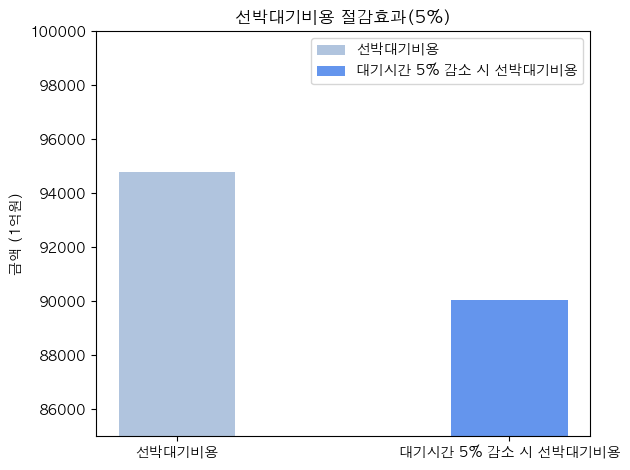

In [389]:
import matplotlib.pyplot as plt

data = (94775, 90036)
labels = ['선박대기비용', '대기시간 5% 감소 시 선박대기비용']

# 데이터의 소수점 이하를 제거하여 자연수로 변환
data = [int(value) for value in data]

bar_width = 0.35  # 각각의 막대 두께
bar_distance = 0.1  # 두 막대 간의 간격

fig, ax = plt.subplots()
bar1 = ax.bar(labels[0], data[0], color='lightsteelblue', width=bar_width, label=labels[0])
bar2 = ax.bar(labels[1], data[1], color='cornflowerblue', width=bar_width, label=labels[1])

ax.legend()
ax.set_ylabel('금액 (1억원)')
ax.set_title('선박대기비용 절감효과(5%)')

# Y 축 범위 설정
plt.ylim(85000,100000 )  # 최소값은 0, 최대값은 데이터의 최대값의 1.1 배로 설정

fig.tight_layout()
plt.show()



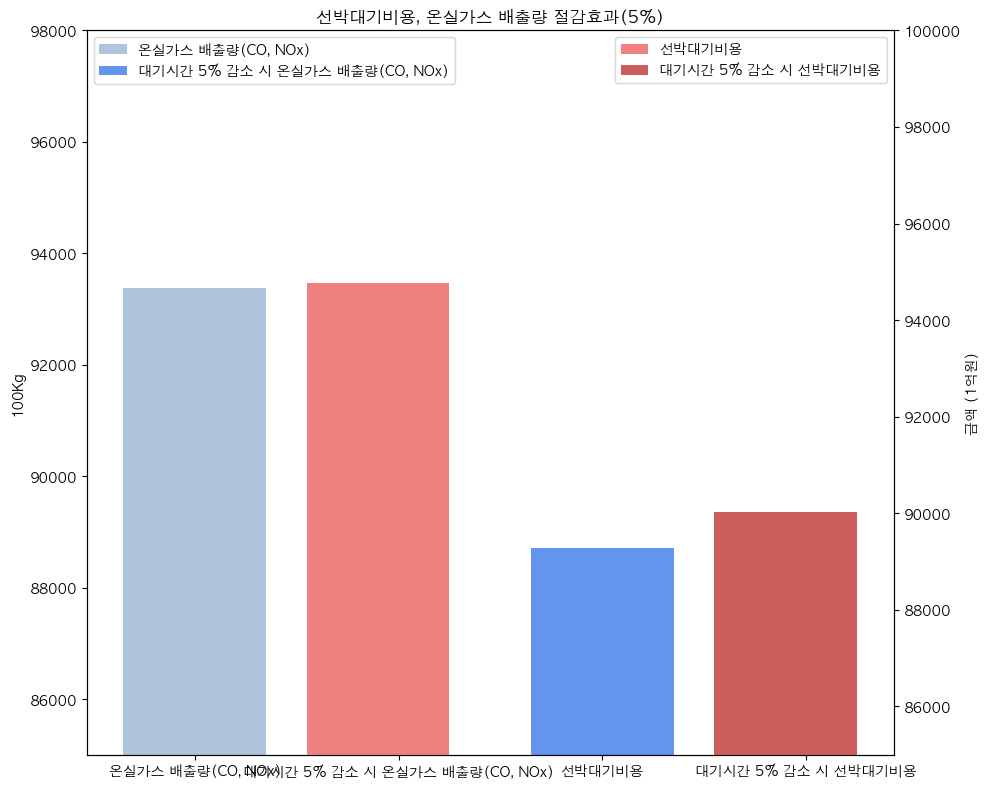

In [394]:
import matplotlib.pyplot as plt
import numpy as np

# 그래프 1
data1 = (93378, 88709)
labels1 = ['온실가스 배출량(CO, NOx)', '대기시간 5% 감소 시 온실가스 배출량(CO, NOx)']

bar_width = 0.35  # 각각의 막대 두께
bar_distance = 0.1  # 두 막대 간의 간격

fig, ax1 = plt.subplots(figsize = (10,8))
bar1_1 = ax1.bar(np.arange(len(labels1)), data1, color=['lightsteelblue', 'cornflowerblue'], width=bar_width, label=labels1)

ax1.set_ylabel('100Kg')

# Y 축 범위 설정
ax1.set_ylim(85000, 98000)  # 최소값은 0, 최대값은 데이터의 최대값의 1.1 배로 설정

# 두 번째 Y 축 생성
ax2 = ax1.twinx()

# 그래프 2
data2 = (94775, 90036)
labels2 = ['선박대기비용', '대기시간 5% 감소 시 선박대기비용']

bar2_1 = ax2.bar(np.arange(len(labels2)) + bar_width + bar_distance, data2, color=['lightcoral', 'indianred'], width=bar_width, label=labels2)

ax2.set_ylabel('금액 (1억원)')
ax2.set_title('선박대기비용, 온실가스 배출량 절감효과(5%)')

# Y 축 범위 설정
ax2.set_ylim(85000, 100000)  # 최소값은 0, 최대값은 데이터의 최대값의 1.1 배로 설정

# 각 서브플롯의 레이블 설정
ax1.set_xticks(np.arange(len(labels1) + len(labels2)) / 2)
ax1.set_xticklabels(labels1 + labels2)

# 범례 표시
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

fig.tight_layout()
plt.show()


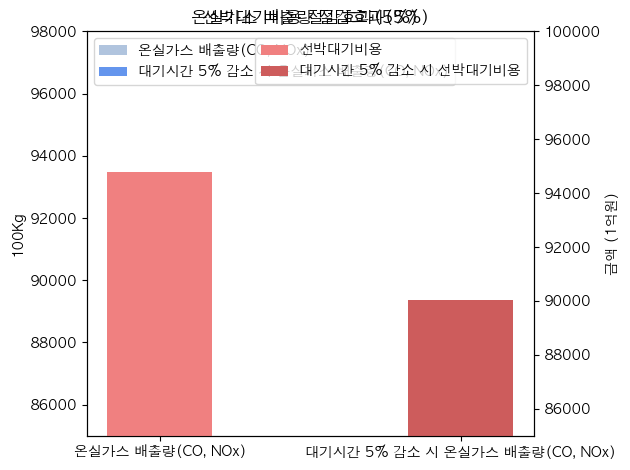

In [395]:
import matplotlib.pyplot as plt
import numpy as np

# 그래프 1
data1 = (93378, 88709)
labels1 = ['온실가스 배출량(CO, NOx)', '대기시간 5% 감소 시 온실가스 배출량(CO, NOx)']

bar_width = 0.35  # 각각의 막대 두께
bar_distance = 0.1  # 두 막대 간의 간격

fig, ax1 = plt.subplots()
bar1_1 = ax1.bar(np.arange(len(labels1)), data1, color=['lightsteelblue', 'cornflowerblue'], width=bar_width, label=labels1)

ax1.set_ylabel('100Kg')
ax1.set_title('온실가스 배출량 절감효과(5%)')

# Y 축 범위 설정
ax1.set_ylim(85000, 98000)  # 최소값은 0, 최대값은 데이터의 최대값의 1.1 배로 설정

# 두 번째 Y 축 생성
ax2 = ax1.twinx()

# 그래프 2
data2 = (94775, 90036)
labels2 = ['선박대기비용', '대기시간 5% 감소 시 선박대기비용']

bar2_1 = ax2.bar(np.arange(len(labels2)), data2, color=['lightcoral', 'indianred'], width=bar_width, label=labels2)

ax2.set_ylabel('금액 (1억원)')
ax2.set_title('선박대기비용 절감효과(5%)')

# Y 축 범위 설정
ax2.set_ylim(85000, 100000)  # 최소값은 0, 최대값은 데이터의 최대값의 1.1 배로 설정

# 각 서브플롯의 레이블 설정
ax1.set_xticks(np.arange(len(labels1)))
ax1.set_xticklabels(labels1)

# 범례 표시
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

fig.tight_layout()
plt.show()


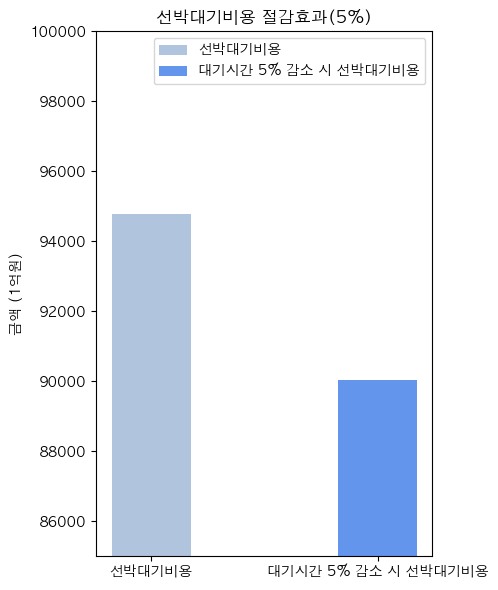

In [406]:
import matplotlib.pyplot as plt

data = (94775, 90036)
labels = ['선박대기비용', '대기시간 5% 감소 시 선박대기비용']

# 데이터의 소수점 이하를 제거하여 자연수로 변환
data = [int(value) for value in data]

bar_width = 0.35  # 각각의 막대 두께
bar_distance = 0.1  # 두 막대 간의 간격

# 그래프 크기 조절
fig, ax = plt.subplots(figsize=(5, 6))

bar1 = ax.bar(labels[0], data[0], color='lightsteelblue', width=bar_width, label=labels[0])
bar2 = ax.bar(labels[1], data[1], color='cornflowerblue', width=bar_width, label=labels[1])

ax.legend()
ax.set_ylabel('금액 (1억원)')
ax.set_title('선박대기비용 절감효과(5%)')

# Y 축 범위 설정
plt.ylim(85000, 100000)  # 최소값은 0, 최대값은 데이터의 최대값의 1.1 배로 설정

fig.tight_layout()
plt.show()


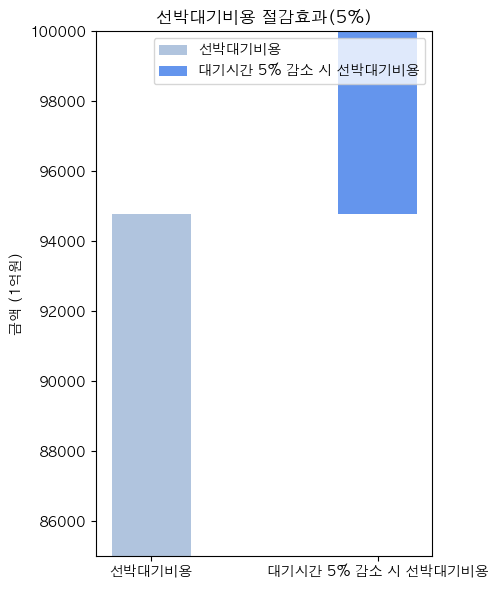

In [407]:
import matplotlib.pyplot as plt

data = (94775, 90036)
labels = ['선박대기비용', '대기시간 5% 감소 시 선박대기비용']

# 데이터의 소수점 이하를 제거하여 자연수로 변환
data = [int(value) for value in data]

bar_width = 0.35  # 각각의 막대 두께
bar_distance = 0.1  # 두 막대 간의 간격

# 그래프 크기 조절
fig, ax = plt.subplots(figsize=(5, 6))

bar1 = ax.bar(labels[0], data[0], color='lightsteelblue', width=bar_width, label=labels[0])
bar2 = ax.bar(labels[1], data[1], color='cornflowerblue', width=bar_width, label=labels[1], bottom=data[0])

ax.legend()
ax.set_ylabel('금액 (1억원)')
ax.set_title('선박대기비용 절감효과(5%)')

# Y 축 범위 설정
plt.ylim(85000, 100000)  # 최소값은 0, 최대값은 데이터의 최대값의 1.1 배로 설정

fig.tight_layout()
plt.show()
